# Global Otsu Threshold Demo

Dieses Notebook lädt ein Grauwertbild, berechnet den globalen Otsu-Schwellwert, erstellt das binäre Bild und speichert es im `output`-Ordner.

In [1]:
import os
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Aktuelles Arbeitsverzeichnis als Projekt-Root
project_root = os.getcwd()
src_dir      = os.path.join(project_root, "src")

# src-Verzeichnis ins Python-Modulverzeichnis aufnehmen
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

# Ausgabe-Ordner erstellen
output_dir = os.path.join(project_root, "output")
os.makedirs(output_dir, exist_ok=True)

# Jetzt kannst du importieren
from otsu_global import otsu_threshold, binarize
from gray_hist    import compute_gray_histogram



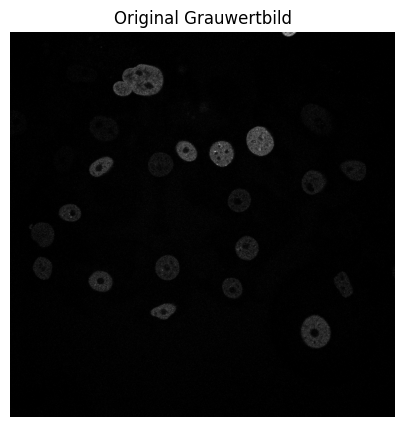

In [2]:
# Bild laden und in ein Grauwert-Array umwandeln
img_path = os.path.join(project_root, "Data", "N2DH-GOWT1", "img", "t01.tif")
pil_image = Image.open(img_path).convert("L")
img_array = np.array(pil_image)

plt.figure(figsize=(5,5))
plt.imshow(img_array, cmap="gray")
plt.title("Original Grauwertbild")
plt.axis("off");

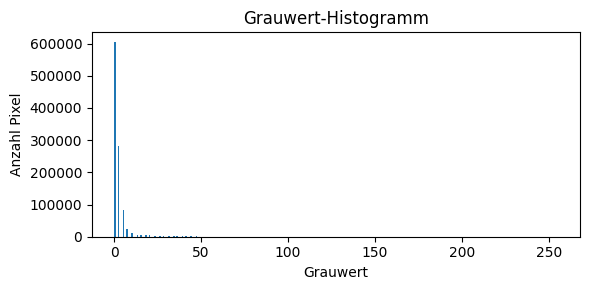

In [3]:
# Histogramm berechnen und Wahrscheinlichkeiten p[k] bestimmen
hist, bin_edges = compute_gray_histogram(img_array)
probabilities = hist / hist.sum()

# Optional: Histogramm anzeigen
plt.figure(figsize=(6,3))
plt.bar(bin_edges[:-1], hist, width=bin_edges[1]-bin_edges[0], align='edge')
plt.title("Grauwert-Histogramm")
plt.xlabel("Grauwert")
plt.ylabel("Anzahl Pixel")
plt.tight_layout();

Berechneter Otsu-Schwellwert: 15
Binärbild gespeichert unter: c:\Users\victo\SynologyDrive\Studium\molekulare Biotechnologie\Heidelberg\Bioinformatik\Projekt\Otsu Treshhold\Otsu_Thresholding_LocalWork\topic01_team03\output\t01_binary.png


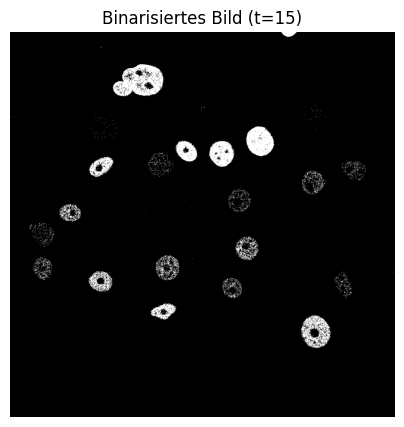

In [4]:
# Otsu-Schwellwert berechnen und Bild binarisieren
threshold = otsu_threshold(probabilities)
binary_bool = binarize(img_array, threshold)
binary_uint8 = (binary_bool.astype(np.uint8) * 255)

print(f"Berechneter Otsu-Schwellwert: {threshold}")

# Binärbild speichern
output_path = os.path.join(output_dir, "t01_binary.png")
Image.fromarray(binary_uint8).save(output_path)
print(f"Binärbild gespeichert unter: {output_path}")

# Binärbild anzeigen
plt.figure(figsize=(5,5))
plt.imshow(binary_bool, cmap="gray")
plt.title(f"Binarisiertes Bild (t={threshold})")
plt.axis("off");